In [1]:
from matplotlib import pyplot as plt
import circle_fit as cf
import numpy as np
import time
import math
import random
import cv2
import os
%run functions.ipynb

## Functions

### Circle-fixer  有問題

In [3]:
## Assume the target circle is the largest object

def getTarget(img):
    contours, hierarchy = cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)  
    list_len = [len(i) for i in contours]
        
    max_len = 0
    index = 0
    for i,l in enumerate(list_len):
        if l > max_len:
            max_len = l
            index = i
            
    target = contours[index]
    target = np.asarray(target).reshape(max_len, 2)

    return target

# os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_1/Cut")
# img, gray = read_img("10_mean_0.bmp")
# height, width = get_imgInfo(img)
# threshed = removeBorder(gray, height, width)

# target = getTarget(threshed)

# print(target)

In [ ]:
img, gray = read_img("10_mean_0.bmp")
height, width = get_imgInfo(img)
thr = removeBorder(gray, height, width)

_, threshed = cv2.threshold(gray, thr,255,cv2.THRESH_BINARY_INV)

target = getTarget(threshed)
print(target)

cv2.imshow("Thresh", threshed)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Test

In [3]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_1/Cut")
# Read image
img, gray = read_img("10_mean_29.bmp")
height, width = get_imgInfo(img)


# Image processing
blur = cv2.GaussianBlur(img,(5,5),0)
dst = cv2.fastNlMeansDenoisingColored(blur,None,10,10,7,21)

gray2 = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
_, threshed = cv2.threshold(gray2,0 ,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# threshed = threshold_moment_preserving(img, gray)
# threshed = removeBorder(gray2, height, width)



# Options

# opened = opening(threshed, 5)
# median = median_filter(threshed, 5)
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(threshed, connectivity=8)

print(nb_components)

# closed = closing(median, 3)
# opened = opening(closed, 3)
# edge = edge_detect(median, 0, 20)

# get all target points
target_points = []
# for i in range(height):
#     for j in range(width):
#         if median[i,j] == 255:
#             target_points.append((i,j))
            

    
# Show processed images    
# cv2.imshow("Original", img)
# cv2.imshow("Gray", gray)
# cv2.imshow("Blur", blur)
# cv2.imshow("Non Local Means", dst)
cv2.imshow("Thresh", threshed)
# cv2.imshow("Median", median)
# cv2.imshow("Opening", opened)
# cv2.imshow("Closing", closed)
# cv2.imshow("Edge", edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

2


In [9]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_1/Cut")
try:
    
    images = os.listdir()
    images.sort()
    
    predictions = []
    for image in images:
        img, gray = read_img(image)
        height, width = get_imgInfo(img)
        
        kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        sharpened = cv2.filter2D(img, -1, 1)
        
        blur = cv2.GaussianBlur(sharpened,(5,5),0)
        dst = cv2.fastNlMeansDenoisingColored(blur,None,5,5,5,15)
        gray2 = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
        _, threshed = cv2.threshold(gray2,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#         threshed = removeBorder(gray2, height, width)
        median = median_filter(threshed, 25)
        
#         closed = closing(median, 2)
#         opened = opening(closed, 3)
        edge = edge_detect(median, 0, 20)

#         # get all target points
#         target_points = []
#         for i in range(height):
#             for j in range(width):
#                 if median[i,j] == 255:
#                     target_points.append([i,j])
                    
        # get edge points
        edge_points = []
        for i in range(height):
            for j in range(width):
                if edge[i,j] == 255:
                    edge_points.append((i,j))
        
#         target = getTarget(median)
#         target_points = []
#         for p in target:
#             target_points.append((p[1],p[0]))


        
        
        # Count center
        cy,cx,r,_ = cf.least_squares_circle((edge_points))
        predictions.append([cx, cy])
        print("{}: {}, {}".format(image ,cx, cy))

    
except Exception as e:
    print(e)

module 'numpy' has no attribute 'bitwise__xor'


In [8]:
show_resoult(predictions)

-----------------------------------------------------
Statistics: 
Mean Centroid: (203.57613, 101.12628)
Variance     : (0.00879, 0.01230)
Max Length   : 0.43099, 0.46305 (pixels)


In [6]:
def swift_algo(gray, Lambda=3, Gamma=2):
    ## Step 1: Image normalization
    norm = gray/255
    
    ## Step 2: Comupte u series from normalized image
    u = np.log(1+norm)
    u_avg = np.mean(u)
    u_std = np.std(u)
    
    ## Step 3: Compute ...
    v = np.power(u, Lambda)/Lambda
    f = np.power( np.exp( (np.tan(u)-u_std) / (np.exp(u)-v)), Gamma)
    
    ## Step 4: Redefine distrubution
    t = (f-np.min(f)) / (np.max(f)-np.min(f))
    final = (t*255).astype('uint8')
    
    return final

## Case1_1

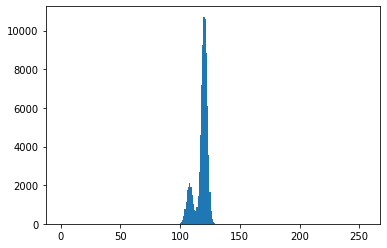

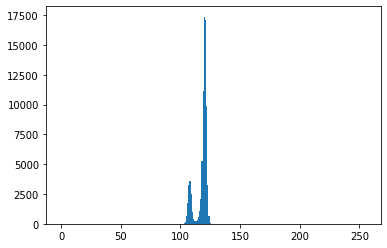

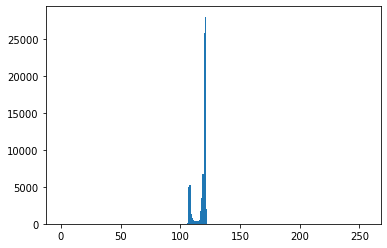

In [ ]:
os.chdir("/home/mj/HardDisk/Github/NTU/ARCS/img/X-Ray/Case_1/Cut")
## Read image
img, gray = read_img("10_mean_80.bmp")
height, width = get_imgInfo(img)
plt.hist(gray.ravel(), bins=256, range=[0, 255])
plt.show()

## Image processing
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.hist(blur.ravel(), bins=256, range=[0, 255])
plt.show()

nlm = cv2.fastNlMeansDenoising(blur,None,10,7,21)
plt.hist(nlm.ravel(), bins=256, range=[0, 255])
plt.show()

_, threshed = cv2.threshold(nlm,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)



## Options
# opened = opening(threshed, 5)
# median = median_filter(threshed, 25)
# closed = closing(median, 3)
# opened = opening(closed, 3)
# edge = edge_detect(median, 0, 20)
            
    
## Save Image

## Show processed images    
# cv2.imshow("Original", img)
# cv2.imshow("Gray", gray)
# cv2.imshow("Blur", blur)
cv2.imshow("Non Local Means", nlm)
# cv2.imshow("Thresh", threshed)
# cv2.imshow("Median", threshed)
# cv2.imshow("Opening", opened)
# cv2.imshow("Closing", closed)
# cv2.imshow("Edge", edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_1/Cut")
try:
    
    images = os.listdir()
    images.sort()
    
    predictions = []
    for image in images:
        img, gray = read_img(image)
        height, width = get_imgInfo(img)
        
        blur = cv2.GaussianBlur(gray,(5,5),0)
        cEn = swift_algo(blur, Lambda=3, Gamma=2)
        dst = cv2.fastNlMeansDenoising(blur,None,10,7,21)
        _, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#         median = median_filter(threshed, 25)
        edge = edge_detect(threshed, 0, 20)

        # get all target points
#         target_points = []
#         for i in range(height):
#             for j in range(width):
#                 if median[i,j] == 255:
#                     target_points.append((i,j))
                    
        # get edge points
        edge_points = []
        for i in range(height):
            for j in range(width):
                if edge[i,j] == 255:
                    edge_points.append((i,j))
        


        # Count center
        cy,cx,r,_ = cf.least_squares_circle((edge_points))
        predictions.append([cx, cy])
        print("{}: {}, {}".format(image ,cx, cy))

    
except Exception as e:
    print(e)

10_mean_0.bmp: 203.7004419670094, 99.33583859199092
10_mean_1.bmp: 203.68706758481366, 99.21511666213033
10_mean_10.bmp: 203.71163214745067, 98.99189999721078
10_mean_11.bmp: 203.60687400243165, 99.19779941953284
10_mean_12.bmp: 203.56343806993806, 99.17563021397173
10_mean_13.bmp: 203.56288700843297, 99.16322681719528
10_mean_14.bmp: 203.5207474661094, 99.2949204068522
10_mean_15.bmp: 203.476446217289, 99.19312093589858
10_mean_16.bmp: 203.56247352608892, 99.20732742166638
10_mean_17.bmp: 203.71383116635698, 99.32798490481072
10_mean_18.bmp: 203.43640357503742, 99.02920627261011
10_mean_19.bmp: 203.61761052498133, 99.08845860757096
10_mean_2.bmp: 203.41772451236133, 98.94743441718101
10_mean_20.bmp: 203.40479772048715, 99.10463297140367
10_mean_21.bmp: 203.53317649013917, 99.26130095829947
10_mean_22.bmp: 203.47136950274995, 99.1501232107837
10_mean_23.bmp: 203.60642484337896, 99.08935344018776
10_mean_24.bmp: 203.799430046932, 99.11415889872603
10_mean_25.bmp: 203.73714203645488, 99.

In [9]:
show_resoult(predictions)

-----------------------------------------------------
Statistics: 
Mean Centroid: (203.61381, 99.17248)
Variance     : (0.01305, 0.01841)
Max Length   : 0.51760, 0.58738 (pixels)


## Case2_1

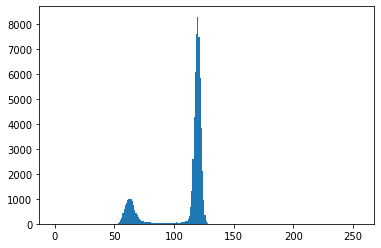

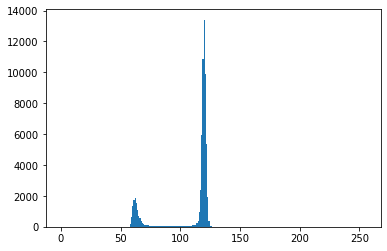

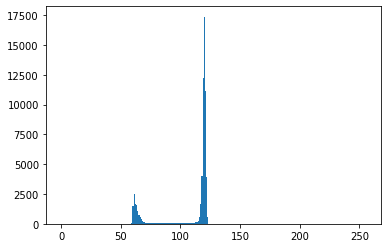

True

In [16]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_2/Cut")
## Read image
img, gray = read_img("10_mean_90.bmp")
height, width = get_imgInfo(img)
plt.hist(gray.ravel(), bins=256, range=[0, 255])
plt.show()

## Image processing
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.hist(blur.ravel(), bins=256, range=[0, 255])
plt.show()

dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
plt.hist(dst.ravel(), bins=256, range=[0, 255])
plt.show()

_, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# threshed = threshold_moment_preserving(img, gray)
# threshed = removeBorder(gray2, height, width)



## Options
# opened = opening(threshed, 5)
median = median_filter(threshed, 25)
closed = closing(median, 3)
opened = opening(closed, 3)
# edge = edge_detect(median, 0, 20)
            
fileName = "/home/mj/Pictures/Histogram/Case2-1/{}.bmp".format(90)
cv2.imwrite(fileName, threshed)    
    
## Show processed images    
# cv2.imshow("Original", img)
# cv2.imshow("Gray", gray)
# cv2.imshow("Blur", blur)
# cv2.imshow("Non Local Means", dst)
# cv2.imshow("Thresh", threshed)
# cv2.imshow("Median", median)
# cv2.imshow("Opening", opened)
# cv2.imshow("Closing", closed)
# cv2.imshow("Edge", edge)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [2]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_2/Cut")
try:
    
    images = os.listdir()
    images.sort()
    
    predictions = []
    for image in images:
        img, gray = read_img(image)
        height, width = get_imgInfo(img)
        
        blur = cv2.GaussianBlur(gray,(5,5),0)
        dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
        _, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#         threshed = removeBorder(gray2, height, width)
        median = median_filter(threshed, 25)
        edge = edge_detect(median, 0, 20)

#         # get all target points
#         target_points = []
#         for i in range(height):
#             for j in range(width):
#                 if median[i,j] == 255:
#                     target_points.append((i,j))
                    
        # get edge points
        edge_points = []
        for i in range(height):
            for j in range(width):
                if edge[i,j] == 255:
                    edge_points.append((i,j))
        
#         target = getTarget(median)
#         target_points = []
#         for p in target:
#             target_points.append((p[1],p[0]))


        # Count center
        cy,cx,r,_ = cf.least_squares_circle((edge_points))
        predictions.append([cx, cy])
        print("{}: {}, {}".format(image ,cx, cy))

    
except Exception as e:
    print(e)

10_mean_0.bmp: 184.21121887684583, 90.26531175869553
10_mean_1.bmp: 184.1631403999064, 90.31700679548871
10_mean_10.bmp: 184.16587103588455, 90.2827477281446
10_mean_11.bmp: 184.22724803041578, 90.27392267120311
10_mean_12.bmp: 184.23721469695974, 90.27099313319589
10_mean_13.bmp: 184.22964538751407, 90.25205059179791
10_mean_14.bmp: 184.19895383835686, 90.32227239584405
10_mean_15.bmp: 184.20371309403478, 90.20483158557252
10_mean_16.bmp: 184.21307201131654, 90.28397831220792
10_mean_17.bmp: 184.23821107998037, 90.28997629146365
10_mean_18.bmp: 184.19341690066491, 90.26150577224041
10_mean_19.bmp: 184.21434532643607, 90.31717575056683
10_mean_2.bmp: 184.22645667029792, 90.33427846721716
10_mean_20.bmp: 184.24402592842023, 90.30919542729401
10_mean_21.bmp: 184.20955732942375, 90.28085890626333
10_mean_22.bmp: 184.19071741343174, 90.26096248462606
10_mean_23.bmp: 184.2003327841611, 90.31676545044066
10_mean_24.bmp: 184.24443295575324, 90.28895584387877
10_mean_25.bmp: 184.2144442762031,

In [3]:
show_resoult(predictions)

-----------------------------------------------------
Statistics: 
Mean Centroid: (184.21782, 90.30095)
Variance     : (0.00086, 0.00108)
Max Length   : 0.15100, 0.13953 (pixels)


## Case2_2

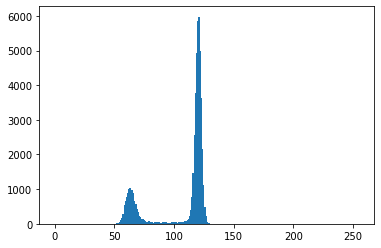

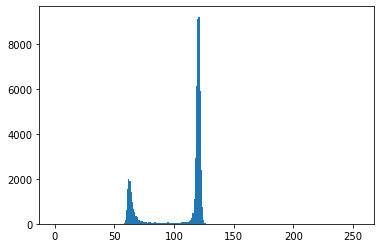

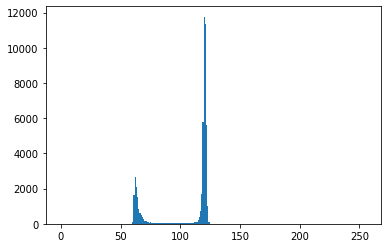

In [20]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_2/Cut_2")
## Read image
img, gray = read_img("10_mean_87.bmp")
height, width = get_imgInfo(img)
plt.hist(gray.ravel(), bins=256, range=[0, 255])
plt.show()

## Image processing
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.hist(blur.ravel(), bins=256, range=[0, 255])
plt.show()

dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
plt.hist(dst.ravel(), bins=256, range=[0, 255])
plt.show()

_, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# threshed = threshold_moment_preserving(img, gray)
# threshed = removeBorder(gray2, height, width)



## Options
# opened = opening(threshed, 5)
median = median_filter(threshed, 25)
closed = closing(median, 3)
opened = opening(closed, 3)
# edge = edge_detect(median, 0, 20)
            

    
## Show processed images    
# cv2.imshow("Original", img)
# cv2.imshow("Gray", gray)
# cv2.imshow("Blur", blur)
# cv2.imshow("Non Local Means", dst)
# cv2.imshow("Thresh", threshed)
# cv2.imshow("Median", median)
# cv2.imshow("Opening", opened)
# cv2.imshow("Closing", closed)
# cv2.imshow("Edge", edge)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [4]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_2/Cut_2")
try:
    
    images = os.listdir()
    images.sort()
    
    predictions = []
    for image in images:
        img, gray = read_img(image)
        height, width = get_imgInfo(img)
        
        blur = cv2.GaussianBlur(gray,(5,5),0)
        dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
        _, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#         threshed = removeBorder(gray2, height, width)
        median = median_filter(threshed, 25)
        edge = edge_detect(median, 0, 20)

#         # get all target points
#         target_points = []
#         for i in range(height):
#             for j in range(width):
#                 if median[i,j] == 255:
#                     target_points.append((i,j))
                    
        # get edge points
        edge_points = []
        for i in range(height):
            for j in range(width):
                if edge[i,j] == 255:
                    edge_points.append((i,j))
        
#         target = getTarget(median)
#         target_points = []
#         for p in target:
#             target_points.append((p[1],p[0]))


        # Count center
        cy,cx,r,_ = cf.least_squares_circle((edge_points))
        predictions.append([cx, cy])
        print("{}: {}, {}".format(image ,cx, cy))

    
except Exception as e:
    print(e)

10_mean_0.bmp: 157.979453130229, 82.16874731762057
10_mean_1.bmp: 158.07156193477886, 82.15922450624107
10_mean_10.bmp: 157.95901329978096, 82.21590911240001
10_mean_11.bmp: 157.9709084444154, 82.22159747828074
10_mean_12.bmp: 158.02980011206162, 82.1405934734219
10_mean_13.bmp: 158.03457056003774, 82.19865126852417
10_mean_14.bmp: 158.0363353191478, 82.1849807965993
10_mean_15.bmp: 157.98012819826235, 82.13806799971418
10_mean_16.bmp: 158.01762839762046, 82.21338414608104
10_mean_17.bmp: 157.99022743188084, 82.18637987539053
10_mean_18.bmp: 158.0517320459714, 82.17737399407329
10_mean_19.bmp: 157.9582565100999, 82.18063135433815
10_mean_2.bmp: 158.0381811299159, 82.1504661949724
10_mean_20.bmp: 157.99037399788284, 82.2009303799137
10_mean_21.bmp: 157.98236392253787, 82.23680196044117
10_mean_22.bmp: 158.04554202256313, 82.20991001664655
10_mean_23.bmp: 157.97729701231754, 82.21956615964872
10_mean_24.bmp: 158.01787914897338, 82.17367038543054
10_mean_25.bmp: 158.01123788510841, 82.198

In [5]:
show_resoult(predictions)

-----------------------------------------------------
Statistics: 
Mean Centroid: (158.01805, 82.20505)
Variance     : (0.00119, 0.00219)
Max Length   : 0.14772, 0.25100 (pixels)


## Case3_1

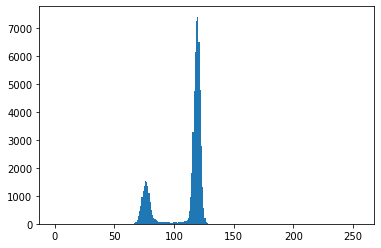

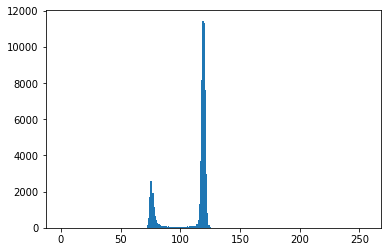

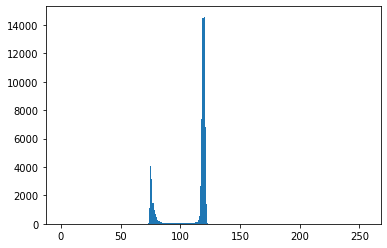

In [21]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_3/Cut")
## Read image
img, gray = read_img("10_mean_87.bmp")
height, width = get_imgInfo(img)
plt.hist(gray.ravel(), bins=256, range=[0, 255])
plt.show()

## Image processing
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.hist(blur.ravel(), bins=256, range=[0, 255])
plt.show()

dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
plt.hist(dst.ravel(), bins=256, range=[0, 255])
plt.show()

_, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# threshed = threshold_moment_preserving(img, gray)
# threshed = removeBorder(gray2, height, width)



## Options
# opened = opening(threshed, 5)
median = median_filter(threshed, 25)
closed = closing(median, 3)
opened = opening(closed, 3)
# edge = edge_detect(median, 0, 20)
            

    
## Show processed images    
# cv2.imshow("Original", img)
# cv2.imshow("Gray", gray)
# cv2.imshow("Blur", blur)
# cv2.imshow("Non Local Means", dst)
# cv2.imshow("Thresh", threshed)
# cv2.imshow("Median", median)
# cv2.imshow("Opening", opened)
# cv2.imshow("Closing", closed)
# cv2.imshow("Edge", edge)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [6]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_3/Cut")
try:
    
    images = os.listdir()
    images.sort()
    
    predictions = []
    for image in images:
        img, gray = read_img(image)
        height, width = get_imgInfo(img)
        
        blur = cv2.GaussianBlur(gray,(5,5),0)
        dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
        _, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#         threshed = removeBorder(gray2, height, width)
        median = median_filter(threshed, 25)
        edge = edge_detect(median, 0, 20)

#         # get all target points
#         target_points = []
#         for i in range(height):
#             for j in range(width):
#                 if median[i,j] == 255:
#                     target_points.append((i,j))
                    
        # get edge points
        edge_points = []
        for i in range(height):
            for j in range(width):
                if edge[i,j] == 255:
                    edge_points.append((i,j))
        
#         target = getTarget(median)
#         target_points = []
#         for p in target:
#             target_points.append((p[1],p[0]))


        # Count center
        cy,cx,r,_ = cf.least_squares_circle((edge_points))
        predictions.append([cx, cy])
        print("{}: {}, {}".format(image ,cx, cy))

    
except Exception as e:
    print(e)

10_mean_0.bmp: 174.7428285726931, 95.9778355378548
10_mean_1.bmp: 174.6496351654838, 96.00485204033511
10_mean_10.bmp: 174.67945916709297, 95.9758445895323
10_mean_11.bmp: 174.7987669230321, 95.89280442822307
10_mean_12.bmp: 174.68989913316048, 95.97438697375902
10_mean_13.bmp: 174.73275321087058, 95.96960568726027
10_mean_14.bmp: 174.70068834327753, 95.96366830240989
10_mean_15.bmp: 174.74357446506968, 95.99714659551258
10_mean_16.bmp: 174.76048575957878, 95.90112042352996
10_mean_17.bmp: 174.75825671874904, 95.90903292013816
10_mean_18.bmp: 174.74234591970432, 95.97731143800965
10_mean_19.bmp: 174.77385957129871, 95.96121883766413
10_mean_2.bmp: 174.7511057072083, 95.97433240078607
10_mean_20.bmp: 174.64600741521744, 96.01027717433466
10_mean_21.bmp: 174.7644542901732, 96.01309470121073
10_mean_22.bmp: 174.67489790826943, 96.0493626084256
10_mean_23.bmp: 174.73923963230564, 96.06658311819027
10_mean_24.bmp: 174.71310462421377, 96.08345706847592
10_mean_25.bmp: 174.7201018760683, 96.1

In [7]:
show_resoult(predictions)

-----------------------------------------------------
Statistics: 
Mean Centroid: (174.72252, 96.01170)
Variance     : (0.00153, 0.00351)
Max Length   : 0.18552, 0.22412 (pixels)


## Case3_2

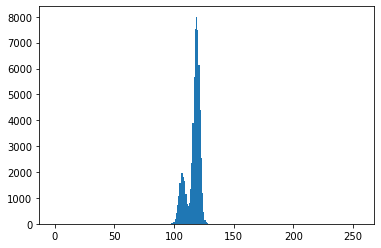

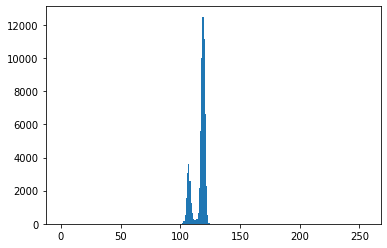

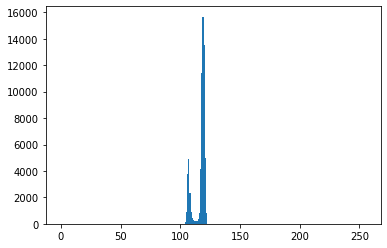

In [22]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_3/Cut_2")
## Read image
img, gray = read_img("10_mean_87.bmp")
height, width = get_imgInfo(img)
plt.hist(gray.ravel(), bins=256, range=[0, 255])
plt.show()

## Image processing
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.hist(blur.ravel(), bins=256, range=[0, 255])
plt.show()

dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
plt.hist(dst.ravel(), bins=256, range=[0, 255])
plt.show()

_, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# threshed = threshold_moment_preserving(img, gray)
# threshed = removeBorder(gray2, height, width)



## Options
# opened = opening(threshed, 5)
median = median_filter(threshed, 25)
closed = closing(median, 3)
opened = opening(closed, 3)
# edge = edge_detect(median, 0, 20)
            

    
## Show processed images    
# cv2.imshow("Original", img)
# cv2.imshow("Gray", gray)
# cv2.imshow("Blur", blur)
# cv2.imshow("Non Local Means", dst)
# cv2.imshow("Thresh", threshed)
# cv2.imshow("Median", median)
# cv2.imshow("Opening", opened)
# cv2.imshow("Closing", closed)
# cv2.imshow("Edge", edge)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [8]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_3/Cut_2")
try:
    
    images = os.listdir()
    images.sort()
    
    predictions = []
    for image in images:
        img, gray = read_img(image)
        height, width = get_imgInfo(img)
        
        blur = cv2.GaussianBlur(gray,(5,5),0)
        dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
        _, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#         threshed = removeBorder(gray2, height, width)
        median = median_filter(threshed, 25)
        edge = edge_detect(median, 0, 20)

#         # get all target points
#         target_points = []
#         for i in range(height):
#             for j in range(width):
#                 if median[i,j] == 255:
#                     target_points.append((i,j))
                    
        # get edge points
        edge_points = []
        for i in range(height):
            for j in range(width):
                if edge[i,j] == 255:
                    edge_points.append((i,j))
        
#         target = getTarget(median)
#         target_points = []
#         for p in target:
#             target_points.append((p[1],p[0]))


        # Count center
        cy,cx,r,_ = cf.least_squares_circle((edge_points))
        predictions.append([cx, cy])
        print("{}: {}, {}".format(image ,cx, cy))

    
except Exception as e:
    print(e)

10_mean_0.bmp: 181.34557052905535, 96.51359726082977
10_mean_1.bmp: 181.51883827315243, 96.6609611352978
10_mean_10.bmp: 181.58618867299484, 96.70616684301207
10_mean_11.bmp: 181.73508849096518, 96.47579022851579
10_mean_12.bmp: 181.41447753620474, 96.75215556095752
10_mean_13.bmp: 181.49684318751085, 96.45077312298443
10_mean_14.bmp: 181.61540285740102, 96.75600732716002
10_mean_15.bmp: 181.5119442938017, 96.59353352794405
10_mean_16.bmp: 181.62281318211072, 96.61544440617125
10_mean_17.bmp: 181.74905964905955, 96.63971403804855
10_mean_18.bmp: 181.61177091543868, 96.65392569377927
10_mean_19.bmp: 181.60299136422316, 96.57031162103613
10_mean_2.bmp: 181.75640070861684, 96.47036041916549
10_mean_20.bmp: 181.48908719074902, 96.68108119997753
10_mean_21.bmp: 181.53332160422156, 96.4794078218591
10_mean_22.bmp: 181.54416239396278, 96.61691013874514
10_mean_23.bmp: 181.4601606935859, 96.67056025063346
10_mean_24.bmp: 181.5295746227035, 96.78429723461696
10_mean_25.bmp: 181.62272808769706, 

In [9]:
show_resoult(predictions)

-----------------------------------------------------
Statistics: 
Mean Centroid: (181.58996, 96.66829)
Variance     : (0.01164, 0.01544)
Max Length   : 0.47752, 0.50072 (pixels)
